Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.
    ->Answer:
    Deep Learning is a subset of machine learning that uses artificial neural networks with multiple layers (deep neural networks) to model and learn complex patterns in data. It evolved from the perceptron model in the 1950s, through backpropagation in the 1980s, to modern architectures like convolutional neural networks (CNNs) and recurrent neural networks (RNNs) in the 2010s, enabled by increased computational power and large datasets.

    It differs from traditional machine learning by automatically learning hierarchical features from raw data without manual feature engineering, making it better suited for unstructured data like images, text, and audio, whereas traditional ML relies on hand-crafted features and simpler models.

Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?
    ->Answer:
    A Perceptron is the simplest form of a neural network, consisting of an input layer, weights, a bias, and an activation function (usually a step function). It computes a weighted sum of inputs plus bias, then applies the activation to produce an output (0 or 1).

    Functioning: For inputs x1, x2, ..., xn, weights w1, w2, ..., wn, bias b, output = activation(sum(wi*xi) + b).

    Limitations: It can only solve linearly separable problems (e.g., AND, OR gates, but not XOR). It has no hidden layers, so it can't model complex non-linear relationships, and it doesn't handle multi-class classification directly.

Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.
    ->Answer:
    Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Without them, the network would be a linear model.

    Sigmoid: f(x) = 1/(1+e^-x), outputs 0-1. Good for binary classification but suffers from vanishing gradient problem.
    ReLU (Rectified Linear Unit): f(x) = max(0,x). Solves vanishing gradient, faster training, but can have dying neurons (output 0 for negative inputs).
    Tanh: f(x) = (e^x - e^-x)/(e^x + e^-x), outputs -1 to 1. Zero-centered, better than sigmoid for hidden layers, but still vanishing gradient.


Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.
    ->Answer:
    The loss function measures the error for a single training example, while the cost function is the average loss over the entire training dataset or a batch.

    Examples:

    Loss: Mean Squared Error (MSE) for regression: (y_pred - y_true)^2.
    Cost: Average MSE over all examples. For classification, loss could be cross-entropy, cost is the mean cross-entropy.


Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.
    ->Answer:
    Optimizers update the model's weights to minimize the loss function during training.

    Gradient Descent: Basic optimizer that updates weights in the direction of the negative gradient. Variants: Batch (slow), Stochastic (noisy), Mini-batch (balanced).
    Adam: Combines momentum and adaptive learning rates. Fast convergence, handles sparse gradients well.
    RMSprop: Adaptive learning rate per parameter, good for non-stationary objectives, less momentum than Adam.

In [1]:
# Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

import numpy as np

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.1
epochs = 100

# Activation function (step)
def step_function(z):
    return 1 if z >= 0 else 0

# Training
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = step_function(z)
        error = y[i] - y_pred
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

# Test
print("Testing AND gate:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    y_pred = step_function(z)
    print(f"Input: {X[i]}, Predicted: {y_pred}, Actual: {y[i]}")

Testing AND gate:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 1, Actual: 1


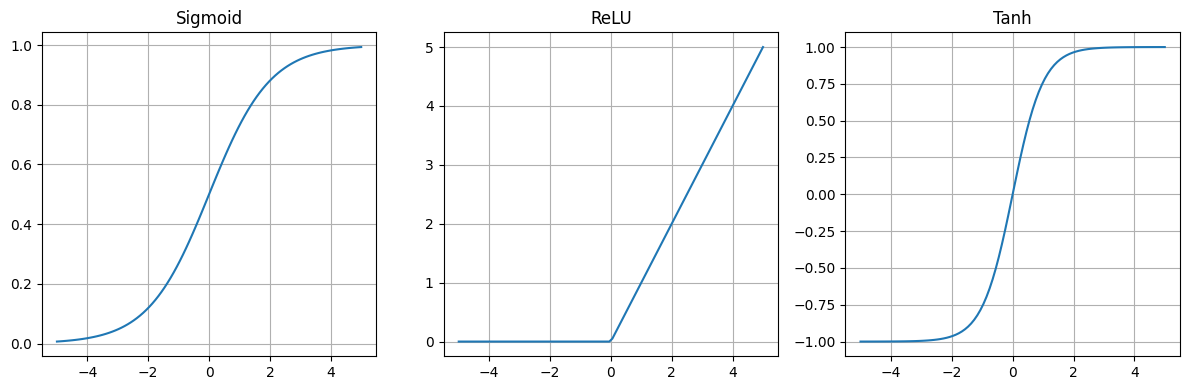

In [2]:
# Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))

# ReLU
relu = np.maximum(0, x)

# Tanh
tanh = np.tanh(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid)
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(x, relu)
plt.title('ReLU')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x, tanh)
plt.title('Tanh')
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
# Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Print training accuracy
print(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8765 - loss: 0.4446 - val_accuracy: 0.9648 - val_loss: 0.1299
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9623 - loss: 0.1280 - val_accuracy: 0.9735 - val_loss: 0.0976
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9748 - loss: 0.0864 - val_accuracy: 0.9758 - val_loss: 0.0826
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.9757 - val_loss: 0.0800
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0445 - val_accuracy: 0.9768 - val_loss: 0.0867
Final training accuracy: 0.9856


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7746 - loss: 0.6463 - val_accuracy: 0.8460 - val_loss: 0.4206
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8576 - loss: 0.3961 - val_accuracy: 0.8618 - val_loss: 0.3646
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8754 - loss: 0.3428 - val_accuracy: 0.8692 - val_loss: 0.3578
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8849 - loss: 0.3105 - val_accuracy: 0.8792 - val_loss: 0.3404
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8930 - loss: 0.2912 - val_accuracy: 0.8825 - val_loss: 0.3279
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8979 - loss: 0.2767 - val_accuracy: 0.8838 - val_loss: 0.3276
Epoch 7/10
1688/1688 ━━━━━━━━━

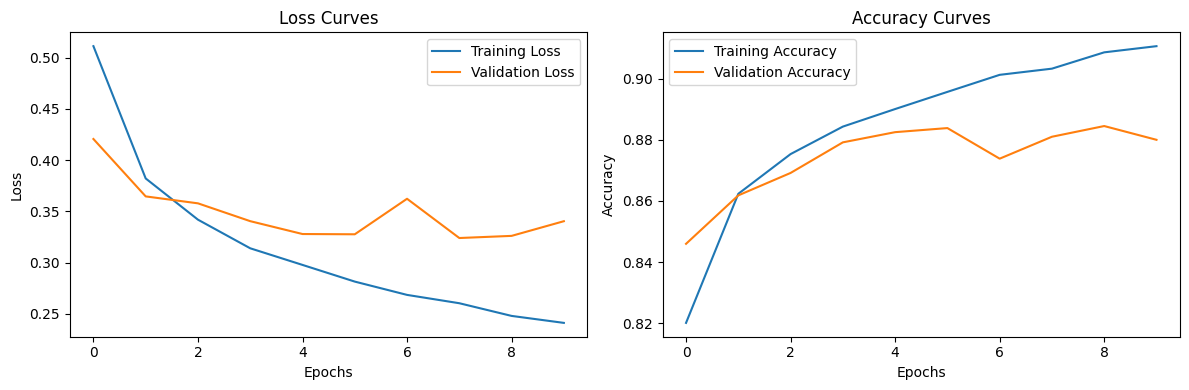

In [4]:
# Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Interpretation: The model is learning as loss decreases and accuracy increases. If validation loss starts increasing while training loss decreases, it indicates overfitting.

Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate. Explain your real-time data science workflow: How would you design a deep learning model (perceptron or multilayer NN)? Which activation function and loss function would you use, and why? How would you train and evaluate the model, considering class imbalance? Which optimizer would be suitable, and how would you prevent overfitting?
    ->Answer:
    Workflow:

    Data preprocessing: Handle imbalance with SMOTE or undersampling, normalize features.
    Model design: Multilayer NN with input layer for features, hidden layers with ReLU, output with sigmoid for binary classification.
    Activation: ReLU for hidden layers (avoids vanishing gradient), sigmoid for output.
    Loss: Binary cross-entropy (suitable for binary classification).
    Training: Use stratified sampling, early stopping. Evaluate with AUC-ROC, precision-recall due to imbalance.
    Optimizer: Adam (adaptive and efficient).
    Prevent overfitting: Dropout, regularization, cross-validation.

Code Example (Simplified):

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd

# Assume df is the dataset
X = df.drop('fraud', axis=1)
y = df['fraud']

# Handle imbalance
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

Code Example (Simplified):

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd

# Assume df is the dataset
X = df.drop('fraud', axis=1)
y = df['fraud']

# Handle imbalance
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

# Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")